<a href="https://colab.research.google.com/github/jhonsnow456/Machine_Learning_Models/blob/main/fake_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./sample_data/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


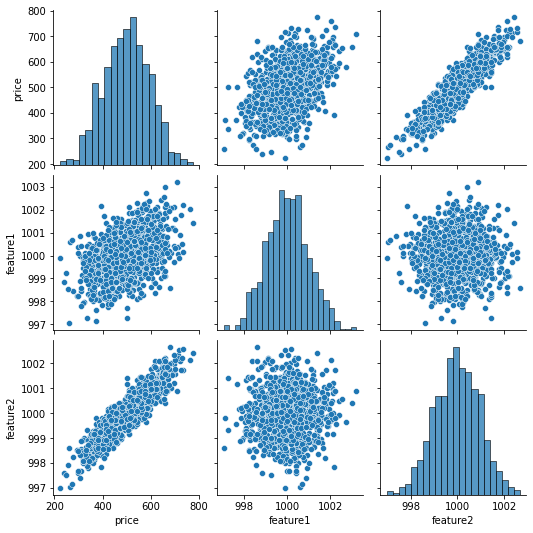

In [3]:
sns.pairplot(data=df, palette='viridis')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

In [6]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [15]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

In [17]:
model.compile(optimizer='rmsprop', loss='mse')

In [19]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 256616.4844
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 256582.6562
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 256545.9531
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 256505.4844
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 256460.8906
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 256411.5312
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 256356.8906
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 256296.4531
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 256230.2344
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 256157.5156
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 256077.2969
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

In [20]:
loss_df = pd.DataFrame(model.history.history)

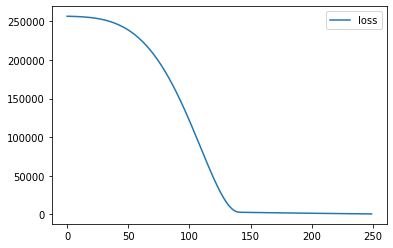

In [21]:
loss_df.plot()

In [22]:
model.metrics_names

['loss']

In [23]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [24]:
training_score

719.67529296875

In [25]:
test_score

735.8792114257812

In [26]:
test_predictions = model.predict(X_test)

In [27]:
test_predictions

array([[432.26422],
       [594.9031 ],
       [576.21014],
       [545.90753],
       [382.86548],
       [558.77625],
       [494.0528 ],
       [480.44565],
       [529.1516 ],
       [473.44135],
       [586.6509 ],
       [559.70374],
       [440.995  ],
       [430.12512],
       [636.9877 ],
       [461.90988],
       [526.1652 ],
       [604.43353],
       [616.4528 ],
       [559.87134],
       [368.7383 ],
       [460.45938],
       [407.50662],
       [413.40894],
       [551.0226 ],
       [574.4747 ],
       [523.923  ],
       [451.0217 ],
       [606.497  ],
       [446.87643],
       [468.0191 ],
       [491.83664],
       [458.48752],
       [629.0152 ],
       [460.2006 ],
       [432.8007 ],
       [526.26025],
       [542.14923],
       [494.2364 ],
       [405.3162 ],
       [595.7388 ],
       [446.71683],
       [584.44   ],
       [477.13928],
       [503.93658],
       [586.12524],
       [645.3106 ],
       [503.7021 ],
       [376.9791 ],
       [490.01855],


In [28]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [29]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
325,535.543676
326,425.843651
327,368.920095
328,505.631884


In [31]:
test_predictions = pd.Series(test_predictions.reshape(330,))

In [32]:
test_predictions

0      432.264221
1      594.903076
2      576.210144
3      545.907532
4      382.865479
          ...    
325    520.728027
326    466.373810
327    418.637024
328    490.556030
329    489.453156
Length: 330, dtype: float32

In [33]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [34]:
pred_df.columns = ['Test Y','Model Predictions']

In [35]:
pred_df

,Test Y,Model Predictions
0,402.296319,432.264221
1,624.156198,594.903076
2,582.455066,576.210144
3,578.588606,545.907532
4,371.224104,382.865479
...,...,...
325,535.543676,520.728027
326,425.843651,466.373810
327,368.920095,418.637024
328,505.631884,490.556030


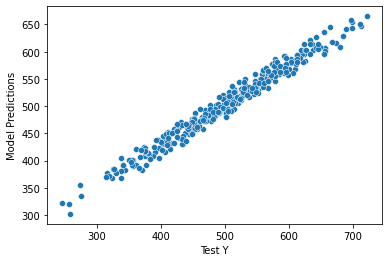

In [38]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


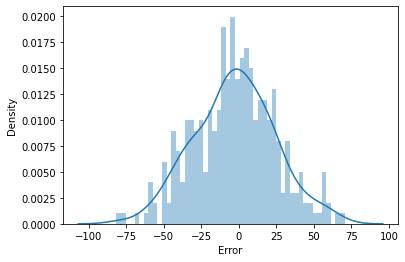

In [39]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

21.45513114146064

In [42]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

735.8792136883014

In [43]:
test_score**0.5

27.127093678198946

In [47]:
new_gem = [[998,1000]]
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [46]:
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[423.8667]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save('my_model.h5')
later_model = load_model('my_model.h5')
later_model.predict(new_gem)

array([[576718.8]], dtype=float32)